In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [2]:
data = pd.read_csv("Titanic.csv")
data.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [3]:
data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
survived       0
dtype: int64

In [4]:
data.Embarked.fillna(method = 'pad' , inplace = True)

In [5]:
data.drop(columns=["Passengerid"] , inplace = True)

In [6]:
data.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [7]:
print(data.Age.dtype , data.Fare.dtype , data.Sex.dtype , data.sibsp.dtype , 
data.Parch.dtype , data.Pclass.dtype , data.Embarked.dtype , data.survived.dtype)

float64 float64 int64 int64 int64 int64 float64 int64


In [21]:
X = data.drop(columns=["Fare"])
Y = data.Fare

In [22]:
X.head()

,Age,Sex,sibsp,Parch,Pclass,Embarked,survived
0,22.0,0,1,0,3,2.0,0
1,38.0,1,1,0,1,0.0,1
2,26.0,1,0,0,3,2.0,1
3,35.0,1,1,0,1,2.0,1
4,35.0,0,0,0,3,2.0,0


In [23]:
x_train , x_test , y_train , y_test = train_test_split(X , Y ,test_size = .2 , random_state= 10)

In [24]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(1047, 7) (262, 7) (1047,) (262,)


In [25]:
model = DecisionTreeRegressor(criterion='mse',splitter='best',max_depth=3 , random_state=10)

In [26]:
model.fit(x_train , y_train)

DecisionTreeRegressor(max_depth=3, random_state=10)

In [27]:
x_train

,Age,Sex,sibsp,Parch,Pclass,Embarked,survived
708,22.00,1,0,0,1,2.0,1
229,28.00,1,3,1,3,2.0,0
85,33.00,1,3,0,3,2.0,1
1141,0.92,1,1,2,2,2.0,0
518,36.00,1,1,0,2,2.0,1
...,...,...,...,...,...,...,...
1180,28.00,0,0,0,3,2.0,0
1147,28.00,0,0,0,3,1.0,0
527,28.00,0,0,0,1,2.0,0
1149,19.00,1,0,0,2,2.0,0


In [28]:
y_train

708     151.5500
229      25.4667
85       15.8500
1141     27.7500
518      26.0000
          ...   
1180      8.0500
1147      7.7500
527     221.7792
1149     13.0000
1289      7.7750
Name: Fare, Length: 1047, dtype: float64

In [29]:
model.score(x_test , y_test)

0.6015900048109816

In [30]:
model.score(x_train , y_train)

0.48359531062508065

In [38]:
x_train.head(1)

,Age,Sex,sibsp,Parch,Pclass,Embarked,survived
708,22.0,1,0,0,1,2.0,1


In [39]:
y_train.head(1)

708    151.55
Name: Fare, dtype: float64

In [33]:
model.predict([[22.00 , 1 , 0 , 0 , 1 , 2.0,1]])
#Checking with x_train row no 708

array([102.353392])

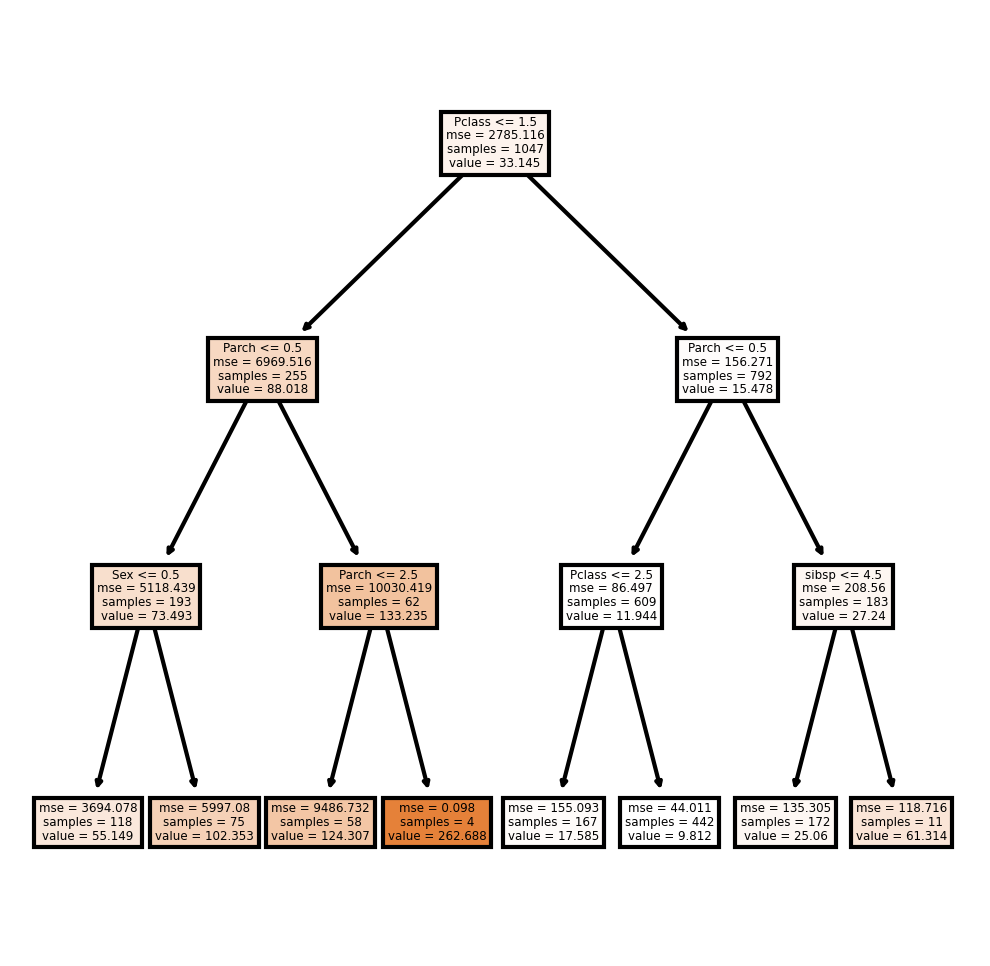

In [40]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(model,
           feature_names = x_train.columns, 
           filled = True);
# Saving your plot if you want
fig.savefig('Image.jpg')